# Agenda
- Vokabular
- Reichhaltigkeit
- Filtern nach Länge
- Frequency distribution
- Bigrams 
- Concordance
- Ähnlichkeit
- Dispersionsplot
- Wordcloud 2.0

In [1]:
import nltk

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Vokabular
- Wie groß ist das Vokabular von Moby Dick?

In [5]:
a = [1,3,3,5,4,5,5,5]
len(set(a))

4

In [6]:
len(set(text1))

19317

In [12]:
len(list(text1))

260819

### Aufgabe

- Das von Sense and Sensibility von Jane Austen?

In [7]:
len(set(text2))

6833

In [9]:
len(text2)

141576

- Und das Vokabular der Menschenrechtserklärung?

In [13]:
from nltk.corpus import udhr
nltk.download("punkt")
sample = (" ").join(udhr.words("German_Deutsch-Latin1"))
tokens = nltk.word_tokenize(sample)
menschenrechtserklaerungs_text = nltk.Text(tokens)
len(set(menschenrechtserklaerungs_text))

[nltk_data] Downloading package punkt to /Users/plotti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


578

# Reichhaltigkeit
- Welcher text ist am reichhaltigesten d.h. das größte Vokabular pro Text?
- Maximaler Quotient ist 1: 100 verschiedene wörter / 100 wörter insgesammt = 1

In [19]:
example_text = ["plotti", "plotti", "plotti"]
example_text2 = ["different", "words", "here"]

In [22]:
len(set(example_text)) / float(len(example_text))

0.3333333333333333

In [23]:
len(set(example_text2)) / float(len(example_text2))

1.0

In [24]:
# Moby Dick
len(set(text1)) / float(len(text1))

0.07406285585022564

### Aufgabe

In [25]:
# Jane Austen
len(set(text2)) / float(len(text2))

0.04826383002768831

In [26]:
# Menschenrechtserklärung
len(set(menschenrechtserklaerungs_text)) / float(len(menschenrechtserklaerungs_text))

0.3797634691195795

# Filtern 
- nach Wörtern bestimmter länge

In [36]:
# Moby Dick
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

### Aufgabe

In [41]:
# Menschenrechtserklärung
# Was sind die längsten wörter dort? 
# dein code hier
V = set(menschenrechtserklaerungs_text)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['Arbeitsbedingungen',
 'Arbeitslosigkeit',
 'Beeinträchtigungen',
 'Berufsschulunterricht',
 'Berücksichtigung',
 'Generalversammlung',
 'Glaubensfreiheit',
 'Gleichberechtigung',
 'Grundschulunterricht',
 'Hochschulunterricht',
 'Lebensbedingungen',
 'Meinungsfreiheit',
 'Meinungsäußerung',
 'Nichtanerkennung',
 'Religionsfreiheit',
 'Staatsangehörigkeit',
 'Staatsanghörigkeit',
 'Unterhaltsmittel',
 'freundschaftlicher',
 'innerstaatlichem',
 'innerstaatlichen',
 'nichtpolitischer',
 'strafrechtlichen',
 'uneingeschränkter',
 'unveräußerlichen',
 'wirtschaftlichen',
 'zusammenzuschließen']

## Filtern nach Länge und Frequenz

In [48]:
fdist1 = FreqDist(text1)
fdist1["the"]

13721

In [53]:
# Wörter die in Moby Dick mind. 12 buchstaben lang sind und mind. 8 mal vorkommen
fdist1 = FreqDist(text2)
sorted(w for w in set(text2) if len(w) > 13 and fdist1[w] > 5)

['disappointment']

# Verteilung
- Welches Wort kommt in Moby Dick am häufigsten vor?
- Hier z.B. die Lyrics des Hits "Versace" von Migos: https://www.youtube.com/watch?v=rF-hq_CHNH0 :) 

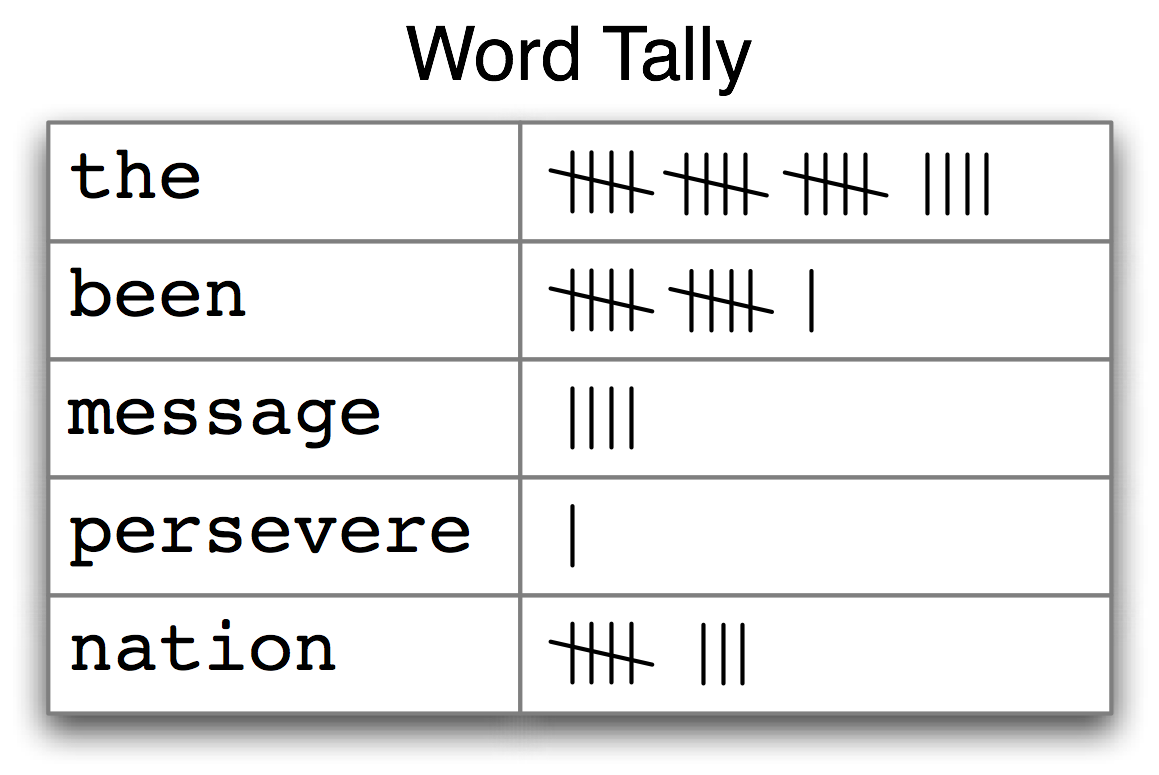

In [28]:
from IPython.display import Image
Image("frequency.png", width=300)

- Welche Wörter kommen am häufigsten bei Moby Dick vor?

In [54]:
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

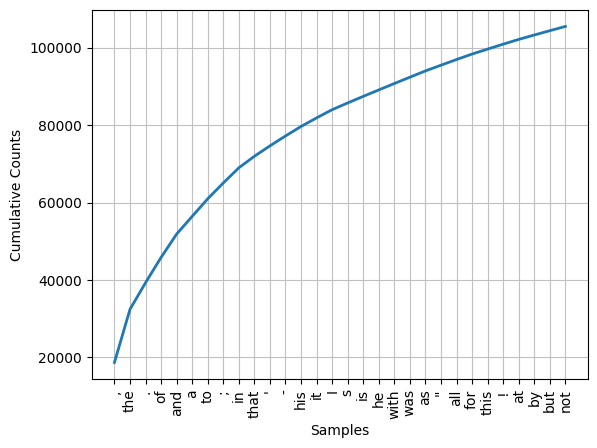

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [55]:
fdist.plot(30, cumulative=True)

- Jedes zusätzliche Wort kommt immer weniger oft vor (diminishing returns)
- Welches Wort kommt in meinem Satz am häufigsten vor?

In [60]:
sample = '''Ich war heute im Wald spazieren und sah ein Reh. Wobeich ich nicht sicher war ob es ein Reh war oder ein Geist.'''
tokens = nltk.word_tokenize(sample)
text = nltk.Text(tokens)
text

<Text: Ich war heute im Wald spazieren und sah...>

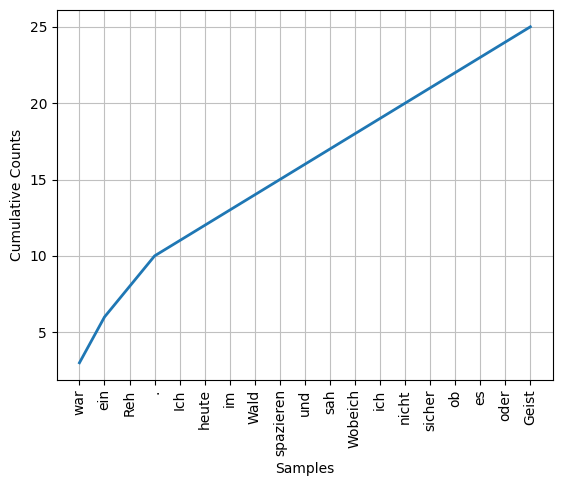

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [61]:
fdist = FreqDist(text)
fdist.plot(30, cumulative=True)

In [23]:
fdist

FreqDist({'war': 3, 'ein': 3, 'Reh': 2, '.': 2, 'Ich': 1, 'heute': 1, 'im': 1, 'wald': 1, 'spazieren': 1, 'und': 1, ...})

### Aufgabe
- Erzeugt eigenen Text oder kopiert ihn aus dem Internet und zählt welche Wörter am häufigsten vorkommen, sind die ersten 3 Positionen bei Euch ähnlich? Warum?

# Bigrams
- Welche Wörter kommen häufig zusammen vor?
- Böhmerman hatte vor ein paar Jahren aus den häufigsten Phrasen einen Popsong gemacht https://www.youtube.com/watch?v=h8MVXC_hqNY

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [66]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [67]:
menschenrechtserklaerungs_text.collocations()

das Recht; Jeder hat; hat das; Niemand darf; Recht auf; Anspruch auf;
Vereinten Nationen; dem Gesetz; auf Grund; Alle Menschen; strafbaren
Handlung; auf gleichen; Allgemeine Erklärung; wegen einer; gegen jede;
der Menschenrechte; notwendig ist; des Landes; diese Erklärung; hat
Anspruch


### Aufgabe
- Welche Bigramms kommen am häufigsten bei einem beliebigen Text von 20min.ch vor?

In [73]:
with open('graeber.txt') as f:
    lines = f.readlines()
utopia = " ".join(lines)

In [81]:
#utopia

In [82]:
tokens = nltk.word_tokenize(utopia)
text = nltk.Text(tokens)
text.collocations()

United States; New York; pretty much; University Press; twentieth
century; Star Trek; Soviet Union; nineteenth century; structural
violence; Middle Ages; let alone; great deal; every aspect; Dark
Knight; Post Office; post office; almost invariably; Iron Law; science
fiction; heroic societies


### Advanced Trigrams

- Bigramme mit Frequenz in der Menschenrechtserklärung

In [88]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(text2)
finder.apply_freq_filter(10) # reduce to bigrams that appeared at least 3 times
finder.nbest(trigram_measures.pmi, 10) 

[('o', "'", 'clock'),
 ('don', "'", 't'),
 ('won', "'", 't'),
 ('put', 'an', 'end'),
 ('drawing', '-', 'room'),
 ('in', 'Harley', 'Street'),
 ('in', 'Berkeley', 'Street'),
 ('ma', "'", 'am'),
 ('two', 'or', 'three'),
 ('a', 'low', 'voice')]

- Trigramme in der Menschenrechtserklärung
- mehr Beispiele unter http://www.nltk.org/howto/collocations.html

In [57]:
finder = TrigramCollocationFinder.from_words(menschenrechtserklaerungs_text)
finder.apply_freq_filter(3) # reduce to bigrams that appeared at least 3 times
finder.nbest(trigram_measures.pmi, 10)

[('hat', 'das', 'Recht'),
 ('Jeder', 'hat', 'das'),
 ('.', 'Niemand', 'darf'),
 ('das', 'Recht', 'auf'),
 ('hat', 'Anspruch', 'auf'),
 ('Jeder', 'hat', 'Anspruch'),
 ('werden', '.', 'Artikel'),
 ('.', 'Jeder', 'hat'),
 (',', 'da', 'die'),
 ('das', 'Recht', ',')]

# Übereinstimmungen oder Konkordanz

- In welchem Kontext steht überall "monstrous" im Text bei Moby Dick?

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


- In welchem Kontext kommen Menschenrechte in der Menschenrechtserklärung vor?

In [60]:
menschenrechtserklaerungs_text.concordance("Recht")

Displaying 25 of 28 matches:
kt ist ist . Artikel 3 Jeder hat das Recht auf Leben , Freiheit und Sicherheit 
fen werden . Artikel 6 Jeder hat das Recht , überall als rechtsfähig anerkannt 
 Handlung beschuldigt wird , hat das Recht , als unschuldig zu gelten , solange
nnerstaatlichem oder internationalem Recht nicht strafbar war . Ebenso darf kei
htigungen . Artikel 13 Jeder hat das Recht , sich innerhalb eines Staates frei 
tsort frei zu wählen . Jeder hat das Recht , jedes Land , einschließlich seines
kzukehren . Artikel 14 Jeder hat das Recht , in anderen Ländern vor Verfolgung 
l zu suchen und zu genießen . Dieses Recht kann nicht in Anspruch genommen werd
verstoßen . Artikel 15 Jeder hat das Recht auf eine Staatsangehörigkeit . Niema
igkeit willkürlich entzogen noch das Recht versagt werden , seine Staatsanghöri
sangehörigkeit oder der Religion das Recht zu heiraten und eine Familie zu grün
und Staat . Artikel 17 Jeder hat das Recht , sowohl allein als auch in Gemeinsc
bt werden .

## Ähnlichkeit: Welche Wörter benutzen den gleichen Kontext?
- Bei Moby Dick?

In [92]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


- Bei Jane Austen?

In [93]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


- In der Menschenrechtserkläreung?

In [95]:
menschenrechtserklaerungs_text.similar("Recht")

## Dispersionsplot
- Welche Wörter kommen wann gemeinsam vor?

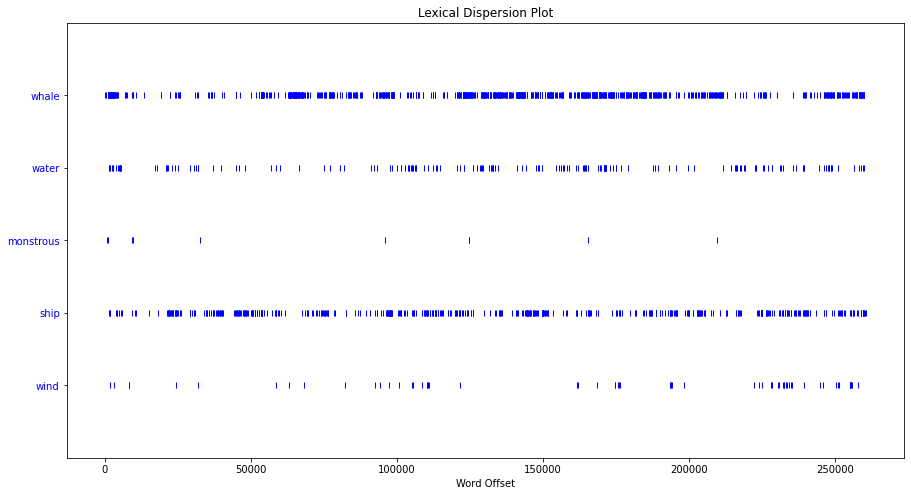

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
text1.dispersion_plot(["whale", "water", "monstrous", "ship", "wind"]) #, 

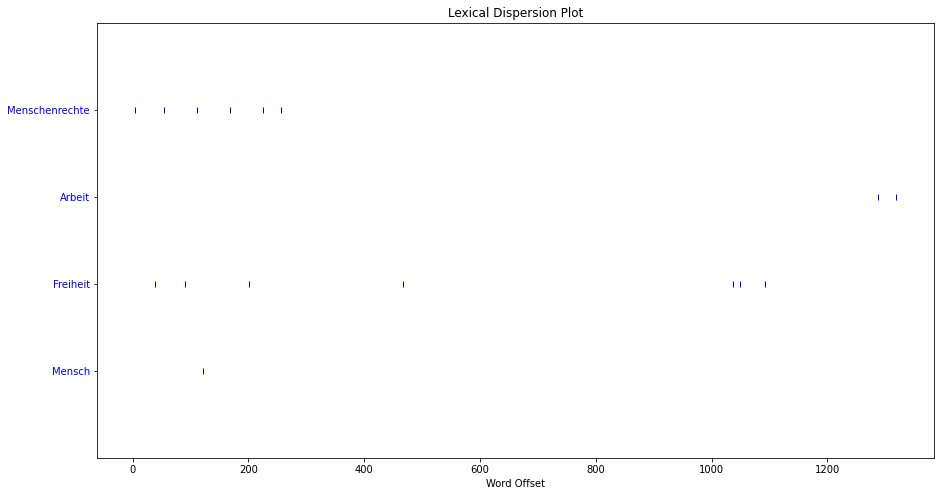

In [65]:
plt.figure(figsize=(15,8))
menschenrechtserklaerungs_text.dispersion_plot(["Menschenrechte", "Arbeit", "Freiheit", "Mensch"])

## Aufgabe:
- Probiert es mal mit einem Dispersionsplot für einen Text eurer Wahl. 

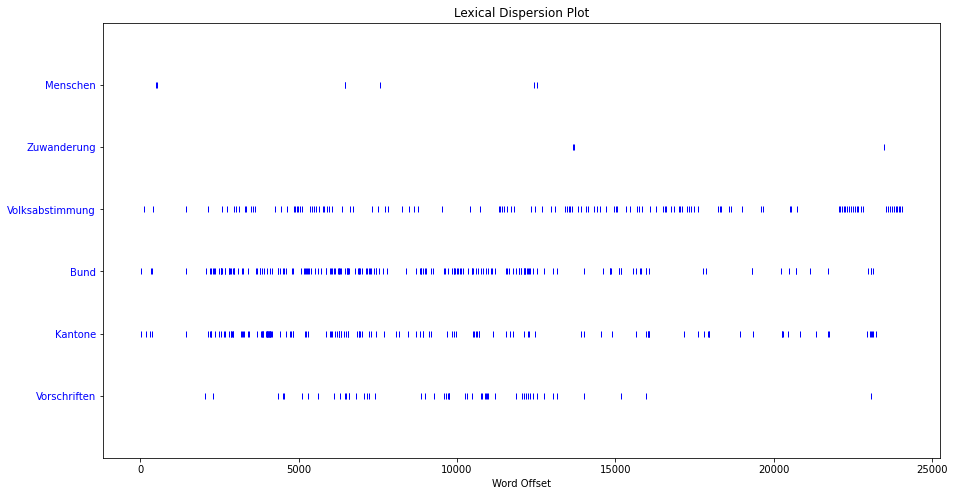

In [106]:
with open('swiss.txt', 'r') as file:
    verfassung = file.read().replace('\n', '')
tokens = nltk.word_tokenize(verfassung)
verfassung_text = nltk.Text(tokens)
plt.figure(figsize=(15,8))
verfassung_text.dispersion_plot(["Menschen", "Zuwanderung", "Volksabstimmung", "Bund", "Kantone", "Vorschriften"])